<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/idongjae/yes/envs/tf25py38/lib/python3.8/site-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/idongjae/yes/envs/tf25py38/lib/python3.8/site-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

Epoch 1/20
313/313 [==============================] - 9s 25ms/step - loss: 0.6082 - accuracy: 0.6512 - val_loss: 0.4577 - val_accuracy: 0.7952
Epoch 2/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4571 - accuracy: 0.7872 - val_loss: 0.4443 - val_accuracy: 0.7926
Epoch 3/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4287 - accuracy: 0.8030 - val_loss: 0.4260 - val_accuracy: 0.8012
Epoch 4/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4139 - accuracy: 0.8099 - val_loss: 0.4208 - val_accuracy: 0.8088
Epoch 5/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4040 - accuracy: 0.8141 - val_loss: 0.4251 - val_accuracy: 0.8110
Epoch 6/20
313/313 [==============================] - 8s 26ms/step - loss: 0.3996 - accuracy: 0.8158 - val_loss: 0.4152 - val_accuracy: 0.8018
Epoch 7/20
313/313 [==============================] - 8s 26ms/step - loss: 0.3905 - accuracy: 0.8217 - val_loss: 0.4098 - val_accuracy: 0.8132

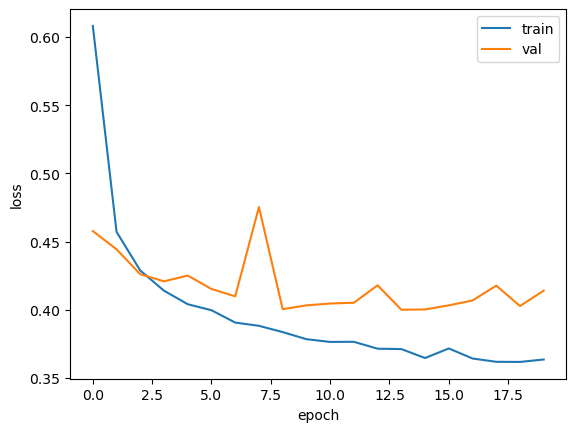

In [2]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# LSTM - GPU를 쓰면 빨라집니다.

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(16, dropout=0.3, return_sequences=True))
model.add(keras.layers.LSTM(16, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))
#model.summary()


rmsprop = keras.optimizers.RMSprop(learning_rate=1e-2) #0.01
#1e-2: 0.01 ==> 학습 속도가 초반엔 빠름, 나중에 가면, accuracy 수렴점에서 진동
#1e-6: 0.000001 ==> 학습이 너무 느려요 ==> accuracy 수렴점에서 진동이 작아요
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=20, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/idongjae/yes/envs/tf25py38/lib/python3.8/site-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/idongjae/yes/envs/tf25py38/lib/python3.8/site-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

Epoch 1/20
313/313 [==============================] - 9s 26ms/step - loss: 0.5494 - accuracy: 0.7115 - val_loss: 0.4751 - val_accuracy: 0.7670
Epoch 2/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4428 - accuracy: 0.7960 - val_loss: 0.4265 - val_accuracy: 0.8014
Epoch 3/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4229 - accuracy: 0.8065 - val_loss: 0.4547 - val_accuracy: 0.7962
Epoch 4/20
313/313 [==============================] - 8s 26ms/step - loss: 0.4089 - accuracy: 0.8127 - val_loss: 0.4071 - val_accuracy: 0.8160
Epoch 5/20
313/313 [==============================] - 8s 26ms/step - loss: 0.3963 - accuracy: 0.8200 - val_loss: 0.4030 - val_accuracy: 0.8188
Epoch 6/20
313/313 [==============================] - 8s 26ms/step - loss: 0.3936 - accuracy: 0.8195 - val_loss: 0.4152 - val_accuracy: 0.8182
Epoch 7/20
313/313 [==============================] - 8s 25ms/step - loss: 0.3870 - accuracy: 0.8254 - val_loss: 0.3939 - val_accuracy: 0.8198

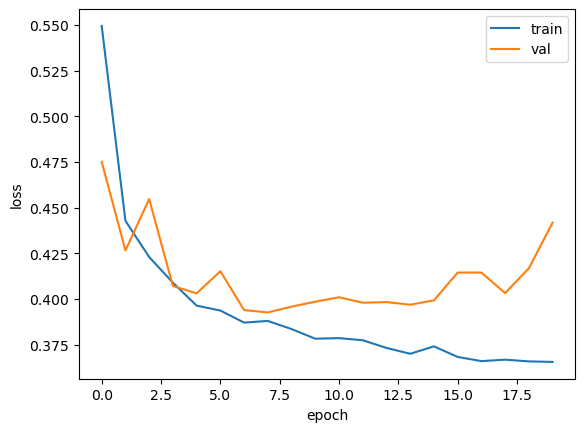

In [3]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# LSTM - GPU를 쓰면 빨라집니다.

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.GRU(8, dropout=0.3, return_sequences=True))
model.add(keras.layers.GRU(16, dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))
#model.summary()


rmsprop = keras.optimizers.RMSprop(learning_rate=1e-2) #0.01
#1e-2: 0.01 ==> 학습 속도가 초반엔 빠름, 나중에 가면, accuracy 수렴점에서 진동
#1e-6: 0.000001 ==> 학습이 너무 느려요 ==> accuracy 수렴점에서 진동이 작아요
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=20, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()